In [9]:
import re, os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
from matplotlib.colors import Normalize 
from sklearn import preprocessing

# Data Import

In [11]:
# Take the case of data in 2012
data_ori = pd.read_csv("data2012.csv")
data_ori = data_ori.drop('fid',axis=1)
data = data_ori.copy()

In [12]:
data.head()

,X,Y,country,fua_name,city_pop,pop2012,road_len,land_cover,night,pop_pred_forest,cen_dist
0,4.487501,51.008333,BE,Bruxelles / Brussel,4892537,206.316861,0.001409,7,14.46,294.177177,27430.20297
1,4.491667,51.008333,BE,Bruxelles / Brussel,4892537,845.095145,0.005011,2,11.22,990.346531,27724.21038
2,4.495834,51.008333,BE,Bruxelles / Brussel,4892537,648.962256,0.009897,7,9.29,915.804058,28022.79795
3,4.500001,51.008333,BE,Bruxelles / Brussel,4892537,0.000000,0.000000,2,12.30,849.833784,28325.82084
4,4.320834,51.004166,BE,Bruxelles / Brussel,4892537,272.925815,0.000000,7,9.66,175.221945,20893.36067


In [13]:
data.describe()

,X,Y,city_pop,pop2012,road_len,land_cover,night,pop_pred_forest,cen_dist
count,877457.000000,877457.000000,8.774570e+05,877457.000000,877457.000000,877457.000000,877457.000000,877457.000000,877457.000000
mean,9.737407,49.120812,4.823933e+06,631.093955,0.005245,6.634389,4.727647,631.633414,48688.738664
std,8.555033,3.980074,3.222885e+06,2658.685320,0.007315,1.990279,11.883446,2200.898338,25998.170093
min,-7.345833,39.875000,1.508113e+06,0.000000,0.000000,1.000000,0.000000,0.007852,4.438934
25%,2.329167,47.750000,2.650374e+06,0.000000,0.000000,7.000000,0.350000,4.151419,29559.522960
50%,12.137501,50.083333,3.565000e+06,2.726041,0.002529,7.000000,0.740000,23.286318,44930.467230
75%,15.837501,52.337500,4.892537e+06,90.896982,0.007508,8.000000,2.820000,153.794309,63838.855230
max,26.462501,54.108333,1.166596e+07,85729.664430,0.059067,11.000000,278.359985,32820.120050,157231.547700


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000274C3BD2988>,
      dtype=object)

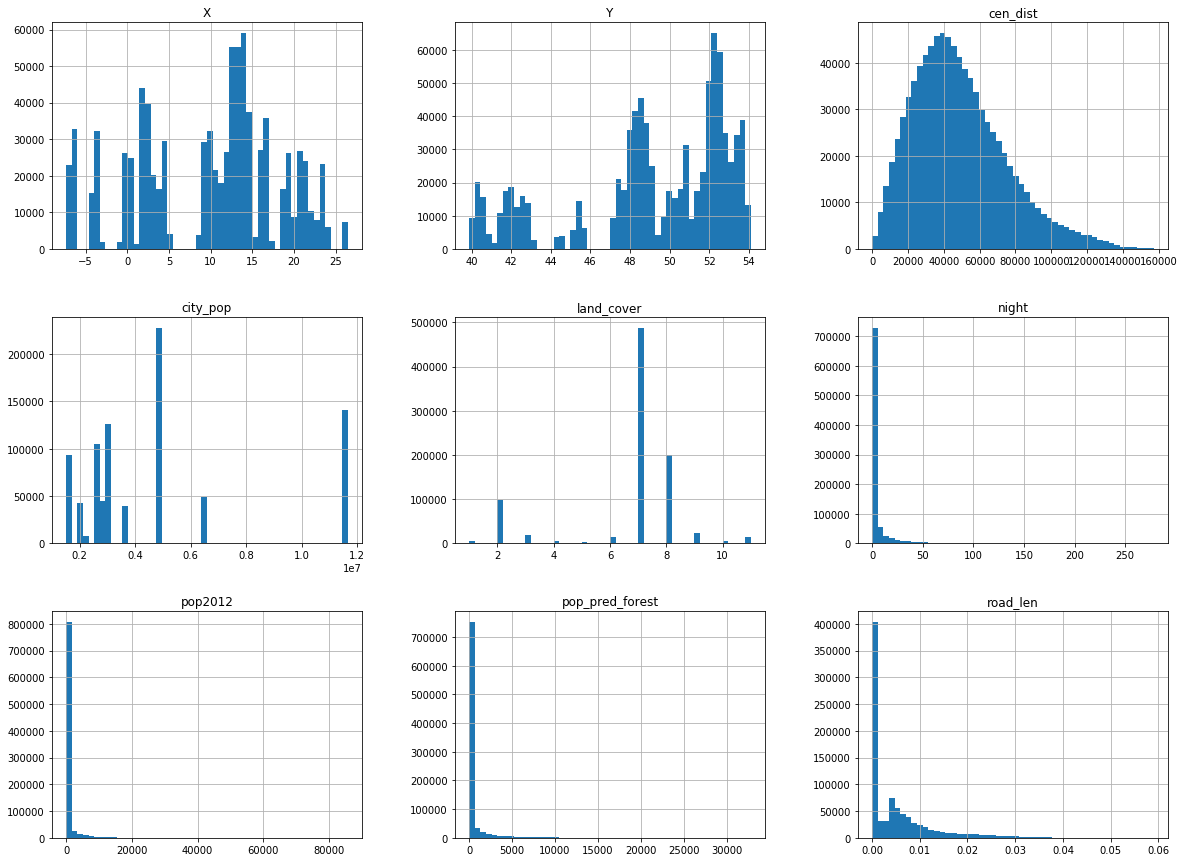

In [14]:
data.hist(bins=50,figsize=(20,15))

# Data Pre-process

In [15]:
# StandardScaler will subtract the mean from each value, then scale to the unit variance
scaler = preprocessing.MinMaxScaler()
blist = ['pop2012','night','road_len','city_pop','cen_dist']
data1 = data[blist]
data_new = scaler.fit_transform(data1.values.reshape(-1, len(blist)))
data_new = pd.DataFrame(data_new, columns=blist)

In [16]:
# Factorize the city id
data_new['land_cover'] = data['land_cover']
data['city_id'] = data['fua_name'].factorize()[0]
data_new['city_id'] = data['city_id']

In [17]:
# Based on different city_id, to normalize the longitude and latitude
alist = ['X','Y']
for col in alist:
    data[col+'_max'] = data.groupby(['city_id'])[col].transform(max)
    data[col+'_min'] = data.groupby(['city_id'])[col].transform(min)
    data_new[col] = ((data[col] - data[col+'_min']) / (data[col+'_max'] - data[col+'_min']))

In [19]:
data_new.head()

,pop2012,night,road_len,city_pop,cen_dist,land_cover,city_id,X,Y
0,0.002407,0.051947,0.023862,0.333183,0.174434,7,0,0.569801,1.000000
1,0.009858,0.040308,0.084837,0.333183,0.176304,2,0,0.572650,1.000000
2,0.007570,0.033374,0.167556,0.333183,0.178203,7,0,0.575499,1.000000
3,0.000000,0.044187,0.000000,0.333183,0.180130,2,0,0.578348,1.000000
4,0.003184,0.034703,0.000000,0.333183,0.132858,7,0,0.455840,0.991803


## Data Export

In [20]:
data_new.to_csv('data_new.csv',index=False)
print('File Exported!')

File Exported!


In [21]:
from sklearn.utils import shuffle
data_shuf = shuffle(data_new)
data_shuf.to_csv('data_shuf.csv',index=False)
print('File Shufflled Exported!')

File Shufflled Exported!
